**Steps for the project**

1. Define Objectives
2. Data collection and loading
3. Data Cleaning and Preperation
4. EDA
5. Model Selection
6. Variable Slection
7. Model Development
8. Model Performance/ Evaluation
9. Insights
10. Business Summary
11. Insights for non-technical stakeholders

**Objectives**

1. To identify which type of marketing channel has the highest impact on over all sales(see how each channel impacts sales)
2. To perform a Division level analysis on the types of marketing channels and impacts on sales
3. Build an optamized marketing channel plan for each division
4. Perform seasonality analysis on the data to see link between marketing channels and sales.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/Sample Media Spend Data.csv')

In [ ]:
data.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


**Data Cleaning and Preperation**

In the data cleaning phase we will:
1.  Remove Duplicates
2. Handle Missing Values
3. Check for Consistancy (ensure consistant data formates)
4. Correct Data Types
5. Outlier Detection and Handeling



In [ ]:
#1 Removeing Duplicates

duplicated_count = data.duplicated().sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 0


In [ ]:
# 0 duplicates. just writing this line as a record
data = data.drop_duplicates()

In [ ]:
#2 handle missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Division                 0
Calendar_Week            0
Paid_Views               0
Organic_Views            0
Google_Impressions       0
Email_Impressions        0
Facebook_Impressions     0
Affiliate_Impressions    0
Overall_Views            0
Sales                    0
dtype: int64


In [ ]:
# no missing values in our data, but as a rule of thumb, if missing values are less then 5% of data, they can be droped. If more than that then a appropriate imputation is needed (mean/median or a more advanced imputation like KNN for more complex data sets)

In [ ]:
# 3,4 check for consistancy and data types

column_format = data.dtypes
print("Column format:\n", column_format)

Column format:
 Division                  object
Calendar_Week             object
Paid_Views                 int64
Organic_Views              int64
Google_Impressions         int64
Email_Impressions        float64
Facebook_Impressions       int64
Affiliate_Impressions      int64
Overall_Views              int64
Sales                      int64
dtype: object


In [ ]:
# outlier detection using z-score mrthod (z-score is a meassure of distance from standard deviation. Z>3 is an outlier, generally)
from scipy import stats

numeric_colums = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions','Overall_Views','Sales']
z_scores = np.abs(stats.zscore(data[numeric_colums]))
outlier = (z_scores > 3).any(axis=1)
outlier_count = outlier.sum()
print("Number of outliers:", outlier_count)

Number of outliers: 265


In [ ]:
row_count = data.shape[0]
print("Number of rows:", row_count)

Number of rows: 3051


In [ ]:
outlierpercentage = (outlier_count/row_count)*100
print("Percentage of outliers:", outlierpercentage,"%")

Percentage of outliers: 8.685676827269747 %


In [ ]:
# 8.6% is too large to drop, doing further analysis to see if there is a business reason for outliers

outlier_rows = data[outlier]
print("Outlier rows:\n", outlier_rows)


Outlier rows:
      Division Calendar_Week  Paid_Views  Organic_Views  Google_Impressions  \
113         B      1/6/2018         167            782                 708   
114         B     1/13/2018         552            143                 441   
115         B     1/20/2018         659            144                 687   
116         B     1/27/2018         108            850                 631   
117         B      2/3/2018         644            949                 730   
...       ...           ...         ...            ...                 ...   
2923        Z    11/23/2019       15133          44957             5238315   
2924        Z    11/30/2019       15281          33245             5283791   
2925        Z     12/7/2019       15164          28586             2384252   
2933        Z      2/1/2020       52480          52321             1185817   
3036        Z    11/23/2019        9563          22234             2259673   

      Email_Impressions  Facebook_Impressions  A

In [ ]:
# since our data does not mention ad spend or special offers, we will keep the outliers because they can be usefull in our business context.
# subsequently we could use a log transform to reduce the impact of our outliers

EDA

1. Understand the Data Structure: Basic overview and information.(done already)
2. Descriptive Statistics: Summary and missing values.
3. Distribution Analysis: Histograms and boxplots.
4. Categorical Analysis: Frequency counts and bar plots.
5. Correlation Analysis: Correlation matrix and heatmap.
6. Relationship Analysis: Pairplots and scatter plots.
7. Time Series Analysis: Trends over time.
8. Data Integrity Check: Duplicates and anomalies. (done already)

In [ ]:
# Descriptive Statistics

summary_stats = data.describe()

print(summary_stats)

          Paid_Views  Organic_Views  Google_Impressions  Email_Impressions  \
count    3051.000000    3051.000000        3.051000e+03       3.051000e+03   
mean    15093.941658   13355.673222        8.861738e+05       7.605094e+05   
std     30785.884979   24079.399689        1.355076e+06       6.260141e+05   
min         1.000000       1.000000        7.000000e+00       4.089445e+04   
25%       537.000000     712.500000        1.698280e+05       3.784969e+05   
50%      2699.000000    4110.000000        4.905310e+05       5.909708e+05   
75%     17358.000000   16230.500000        1.022622e+06       9.622466e+05   
max    518190.000000  270453.000000        1.715044e+07       7.317730e+06   

       Facebook_Impressions  Affiliate_Impressions  Overall_Views  \
count          3.051000e+03            3051.000000    3051.000000   
mean           2.691269e+05           22910.902655   27980.914127   
std            4.665117e+05           21617.637497   52054.976687   
min            2.9000

In [ ]:
for col in numeric_colums:
  range_value = data[col].max() - data[col].min()
  print(f"Range of {col}: {range_value}")

Range of Paid_Views: 518189
Range of Organic_Views: 270452
Range of Google_Impressions: 17150432
Range of Email_Impressions: 7276835.80168
Range of Facebook_Impressions: 7558406
Range of Affiliate_Impressions: 174881
Range of Overall_Views: 635055
Range of Sales: 3559994


In [ ]:
for col in numeric_colums:
  variance = data[col].var()
  print(f"Variance of {col}: {variance}")

Variance of Paid_Views: 947770713.921841
Variance of Organic_Views: 579817489.3958039
Variance of Google_Impressions: 1836230470178.0552
Variance of Email_Impressions: 391893682871.59735
Variance of Facebook_Impressions: 217633135197.98944
Variance of Affiliate_Impressions: 467322250.9429798
Variance of Overall_Views: 2709720597.8562293
Variance of Sales: 53920509336.106926


In [ ]:
# +ve shows a right side skew
for col in numeric_colums:
  skewness = data[col].skew()
  print(f"Skewness of {col}: {skewness}")

Skewness of Paid_Views: 5.199006148169808
Skewness of Organic_Views: 4.2322169407453565
Skewness of Google_Impressions: 4.5556116926469645
Skewness of Email_Impressions: 2.587596985373788
Skewness of Facebook_Impressions: 5.988878784248841
Skewness of Affiliate_Impressions: 2.3161772243458856
Skewness of Overall_Views: 4.212281554586468
Skewness of Sales: 5.622929512678552


In [ ]:
# high kurtosis means fat tails and high outliers
for col in numeric_colums:
  kurtosis = data[col].kurtosis()
  print(f"Kurtosis of {col}: {kurtosis}")

Kurtosis of Paid_Views: 45.4428632963287
Kurtosis of Organic_Views: 25.88615350396385
Kurtosis of Google_Impressions: 33.24804214843021
Kurtosis of Email_Impressions: 11.207512730948375
Kurtosis of Facebook_Impressions: 57.6127232825716
Kurtosis of Affiliate_Impressions: 6.882995575768058
Kurtosis of Overall_Views: 25.620235758290534
Kurtosis of Sales: 54.06561258683477


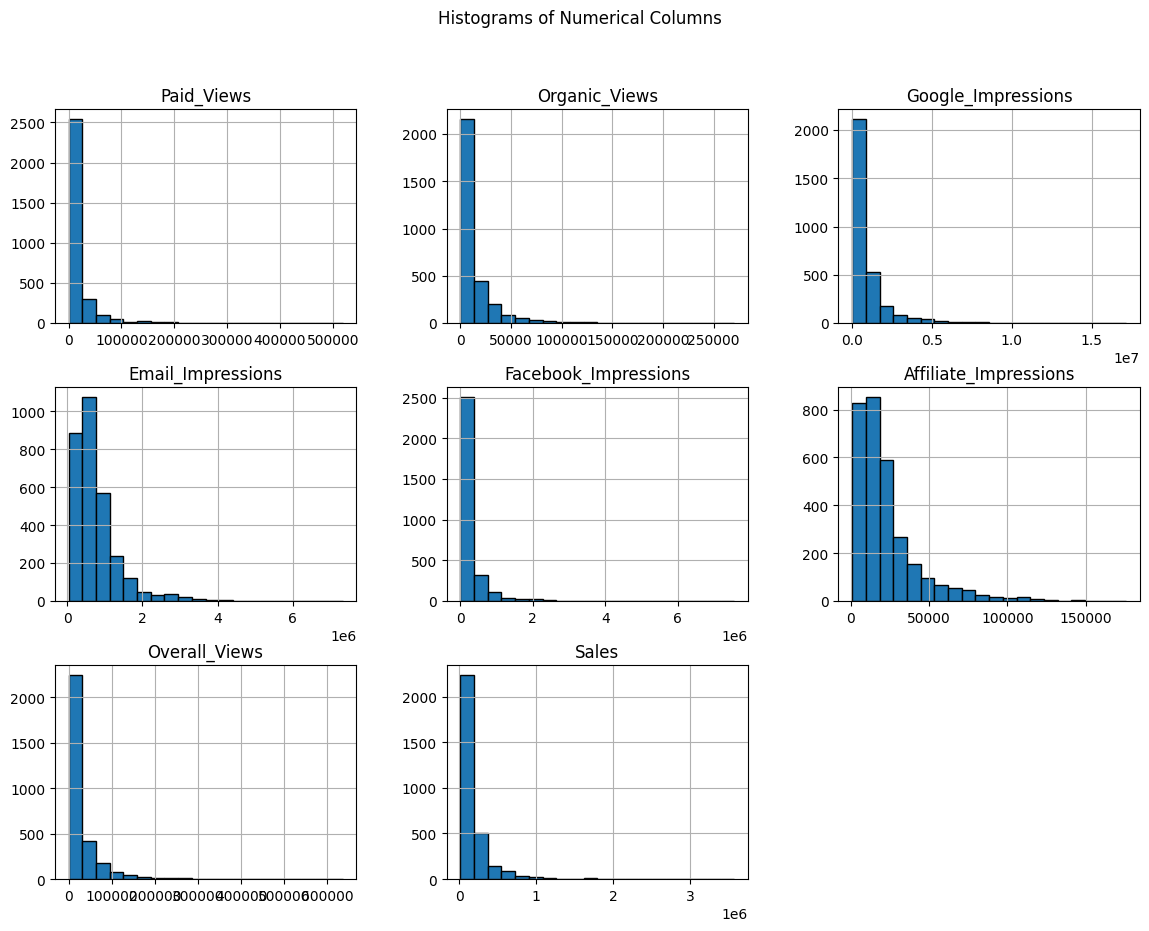

In [ ]:
# histograms

data[numeric_colums].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

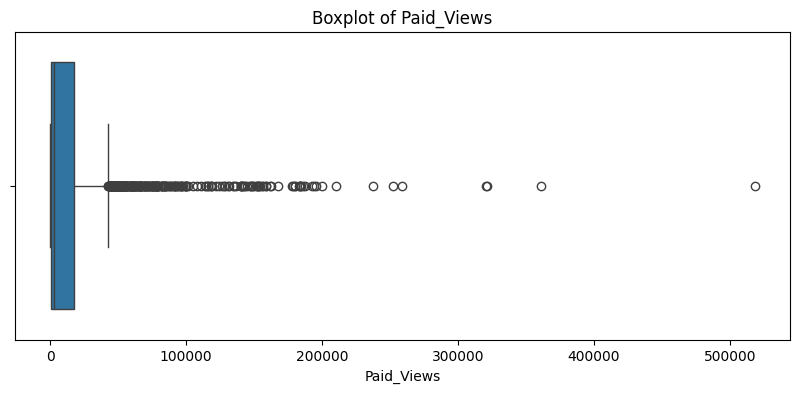

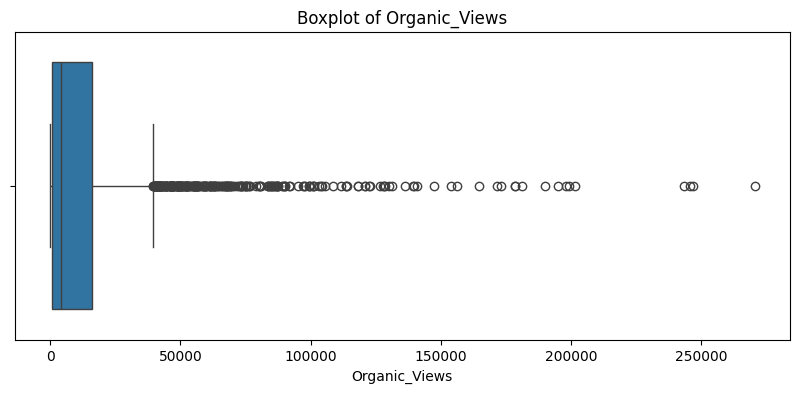

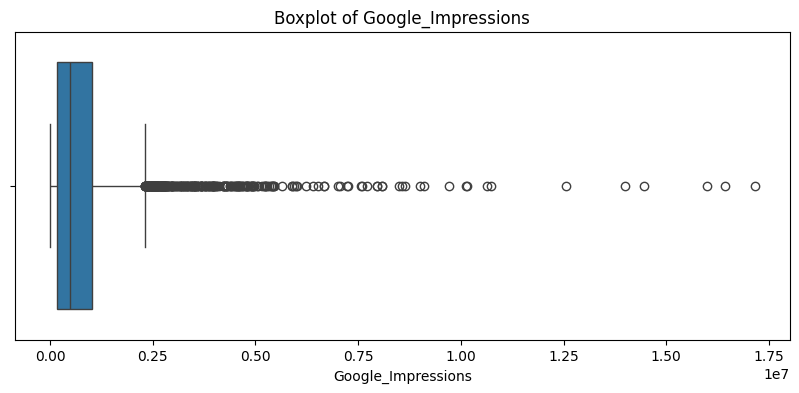

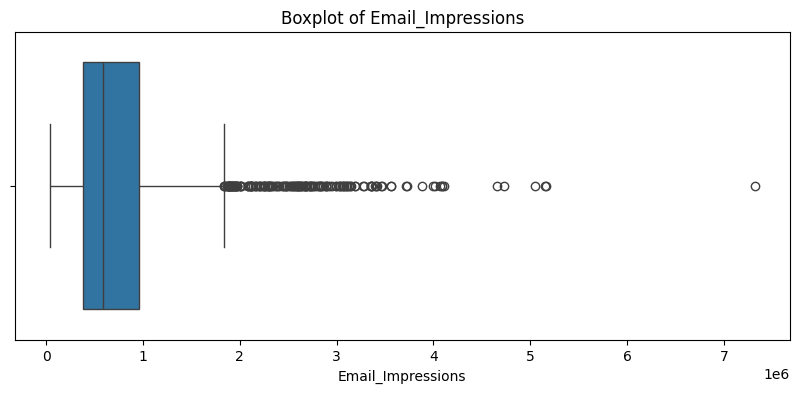

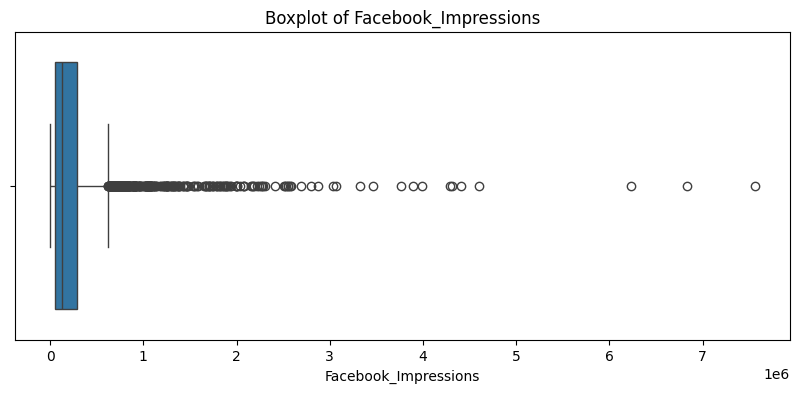

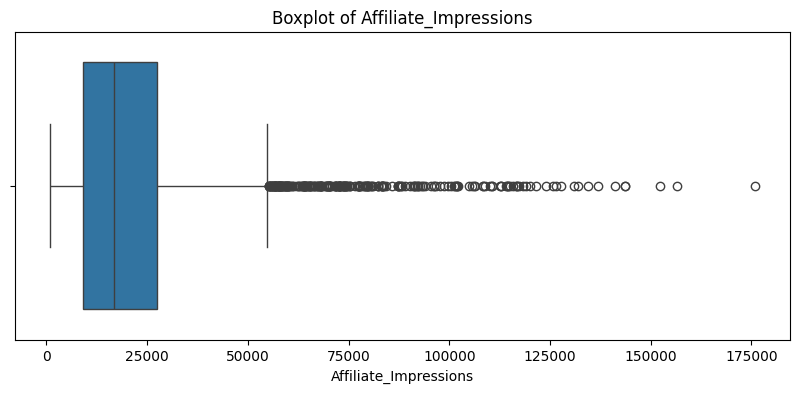

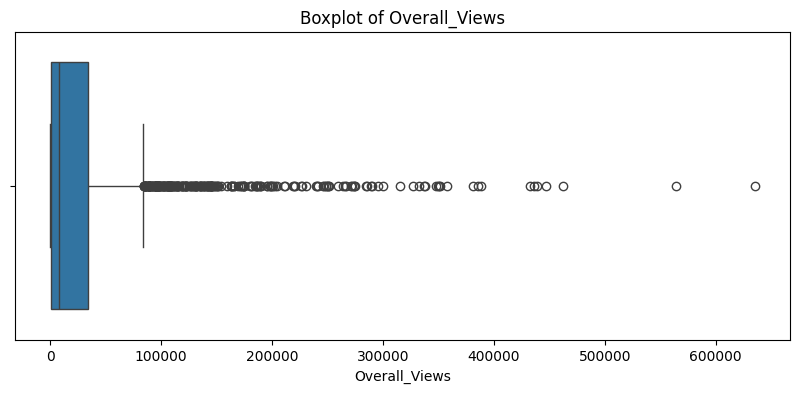

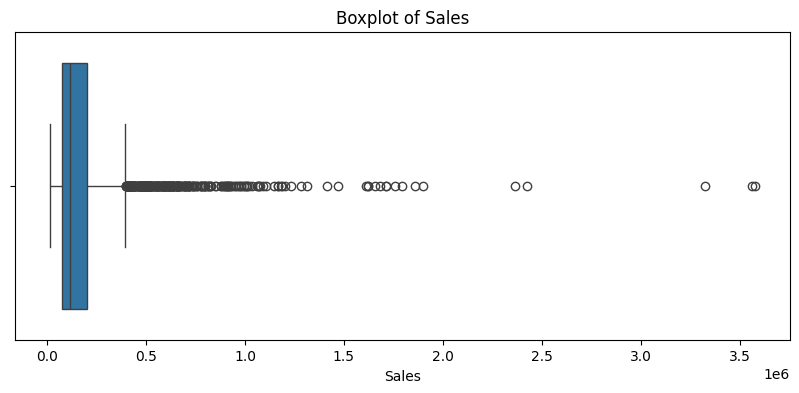

In [ ]:
#boxplot

for col in numeric_colums:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Compute the correlation matrix
corr_matrix = data[numeric_colums].corr()


print(corr_matrix)

                       Paid_Views  Organic_Views  Google_Impressions  \
Paid_Views               1.000000       0.798104            0.305230   
Organic_Views            0.798104       1.000000            0.429167   
Google_Impressions       0.305230       0.429167            1.000000   
Email_Impressions        0.290203       0.342697            0.636719   
Facebook_Impressions     0.318325       0.410265            0.728787   
Affiliate_Impressions    0.215768       0.231719            0.353054   
Overall_Views            0.960312       0.934390            0.379076   
Sales                    0.289688       0.390960            0.783338   

                       Email_Impressions  Facebook_Impressions  \
Paid_Views                      0.290203              0.318325   
Organic_Views                   0.342697              0.410265   
Google_Impressions              0.636719              0.728787   
Email_Impressions               1.000000              0.515894   
Facebook_Impressions 

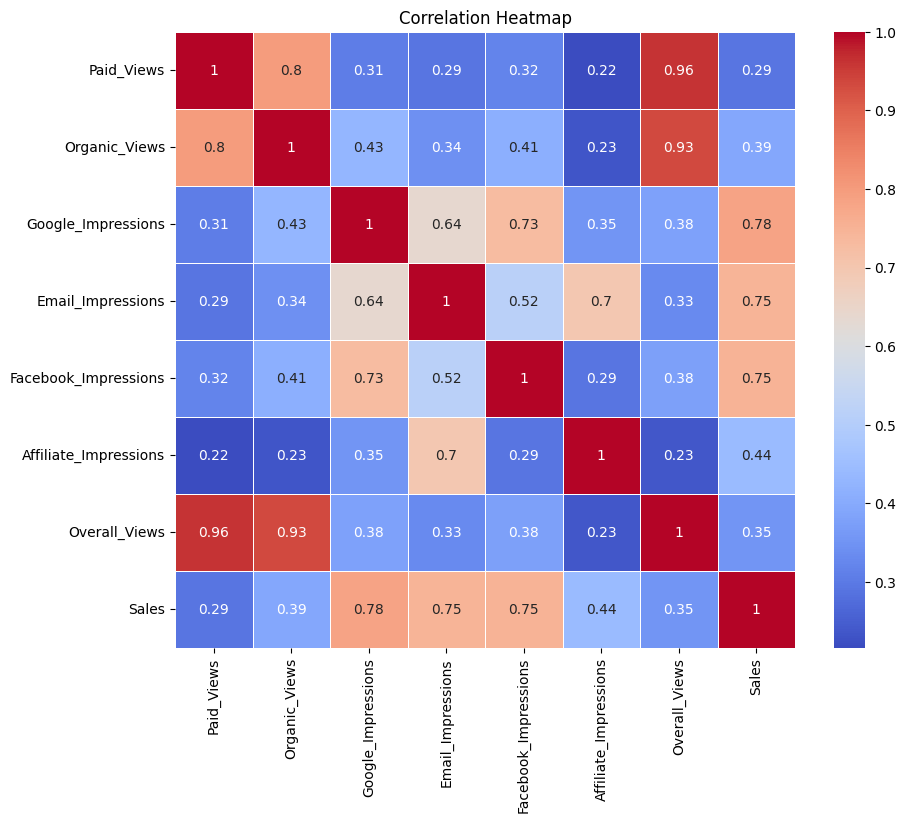

In [ ]:
#Heat map for corealtion

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# since google impressions and facebook impressions are highly corealtaed we are going to create a new variable called 'Social_Media_impressions' and check

data['Social_Media_impressions'] = data['Google_Impressions'] + data['Facebook_Impressions']

In [ ]:
#add Social_Media_impressions in numeric_columns

numeric_colums.append('Social_Media_impressions')

In [ ]:
# Compute the correlation matrix
corr_matrix = data[numeric_colums].corr()


print(corr_matrix)

                          Paid_Views  Organic_Views  Google_Impressions  \
Paid_Views                  1.000000       0.798104            0.305230   
Organic_Views               0.798104       1.000000            0.429167   
Google_Impressions          0.305230       0.429167            1.000000   
Email_Impressions           0.290203       0.342697            0.636719   
Facebook_Impressions        0.318325       0.410265            0.728787   
Affiliate_Impressions       0.215768       0.231719            0.353054   
Overall_Views               0.960312       0.934390            0.379076   
Sales                       0.289688       0.390960            0.783338   
Social_Media_impressions    0.325881       0.448112            0.982702   

                          Email_Impressions  Facebook_Impressions  \
Paid_Views                         0.290203              0.318325   
Organic_Views                      0.342697              0.410265   
Google_Impressions                 0.63671

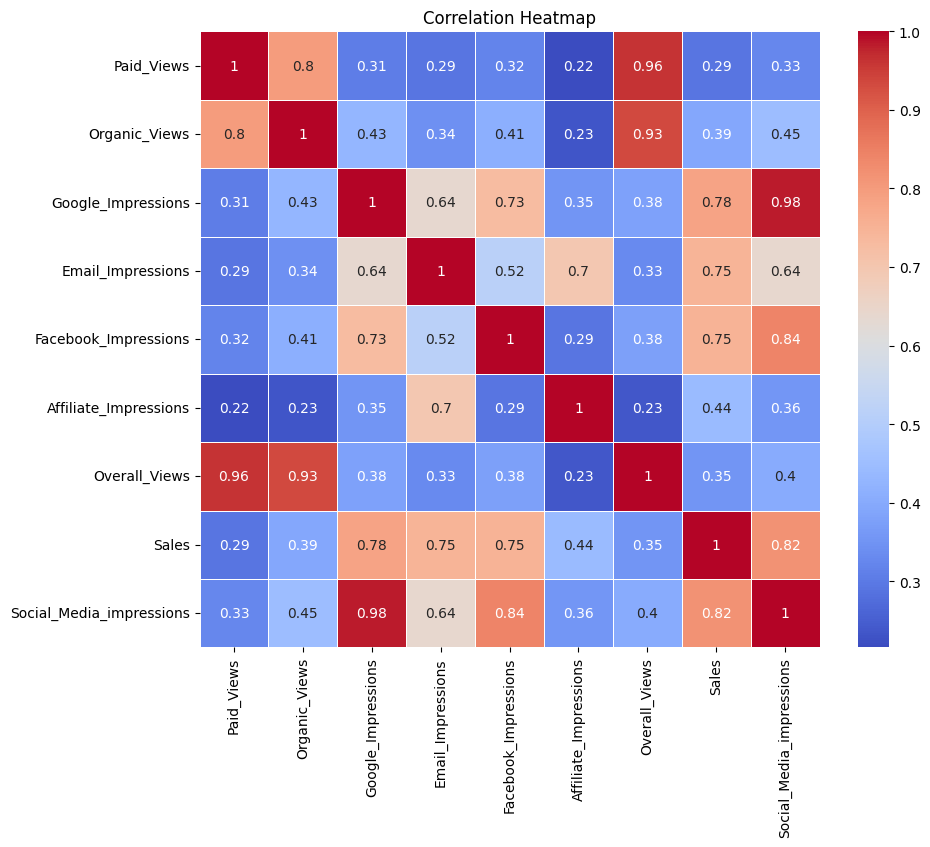

In [ ]:
#Heat map for corealtion

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Sort the data by Sales in descending order to find the top 5 weeks
top_5_weeks = data[['Calendar_Week', 'Sales']].sort_values(by='Sales', ascending=False).head(5)

# Sort the data by Sales in ascending order to find the bottom 5 weeks
bottom_5_weeks = data[['Calendar_Week', 'Sales']].sort_values(by='Sales', ascending=True).head(5)

# Display the results
print("Top 5 Weeks with Highest Sales:")
print(top_5_weeks)

print("\nBottom 5 Weeks with Lowest Sales:")
print(bottom_5_weeks)



Top 5 Weeks with Highest Sales:
    Calendar_Week    Sales
213     12/7/2019  3575430
212    11/30/2019  3561292
159    11/24/2018  3322758
214    12/14/2019  2424124
160     12/1/2018  2363272

Bottom 5 Weeks with Lowest Sales:
     Calendar_Week  Sales
2230     8/10/2019  15436
2228     7/27/2019  18432
2160      4/7/2018  18440
2152     2/10/2018  19899
2178     8/11/2018  20377


highest sales around holiday season. tracks


<ipython-input-158-88cf9e7693ef>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Division', y='Sales', data=sales_by_division, palette='viridis')


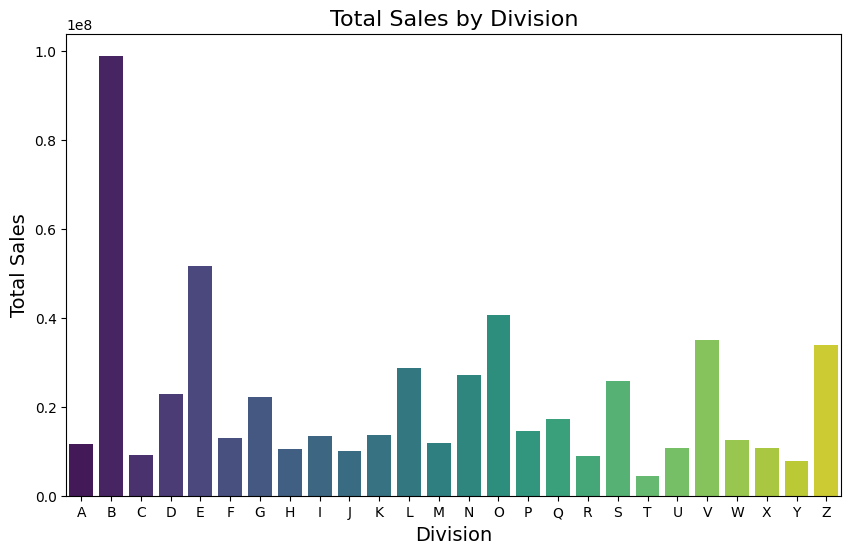

In [ ]:
# Aggregate sales by division
sales_by_division = data.groupby('Division')['Sales'].sum().reset_index()

# Plotting Sales by Division
plt.figure(figsize=(10, 6))
sns.barplot(x='Division', y='Sales', data=sales_by_division, palette='viridis')

# Adding title and labels
plt.title('Total Sales by Division', fontsize=16)
plt.xlabel('Division', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Display the plot
plt.show()

Div B is clear leader

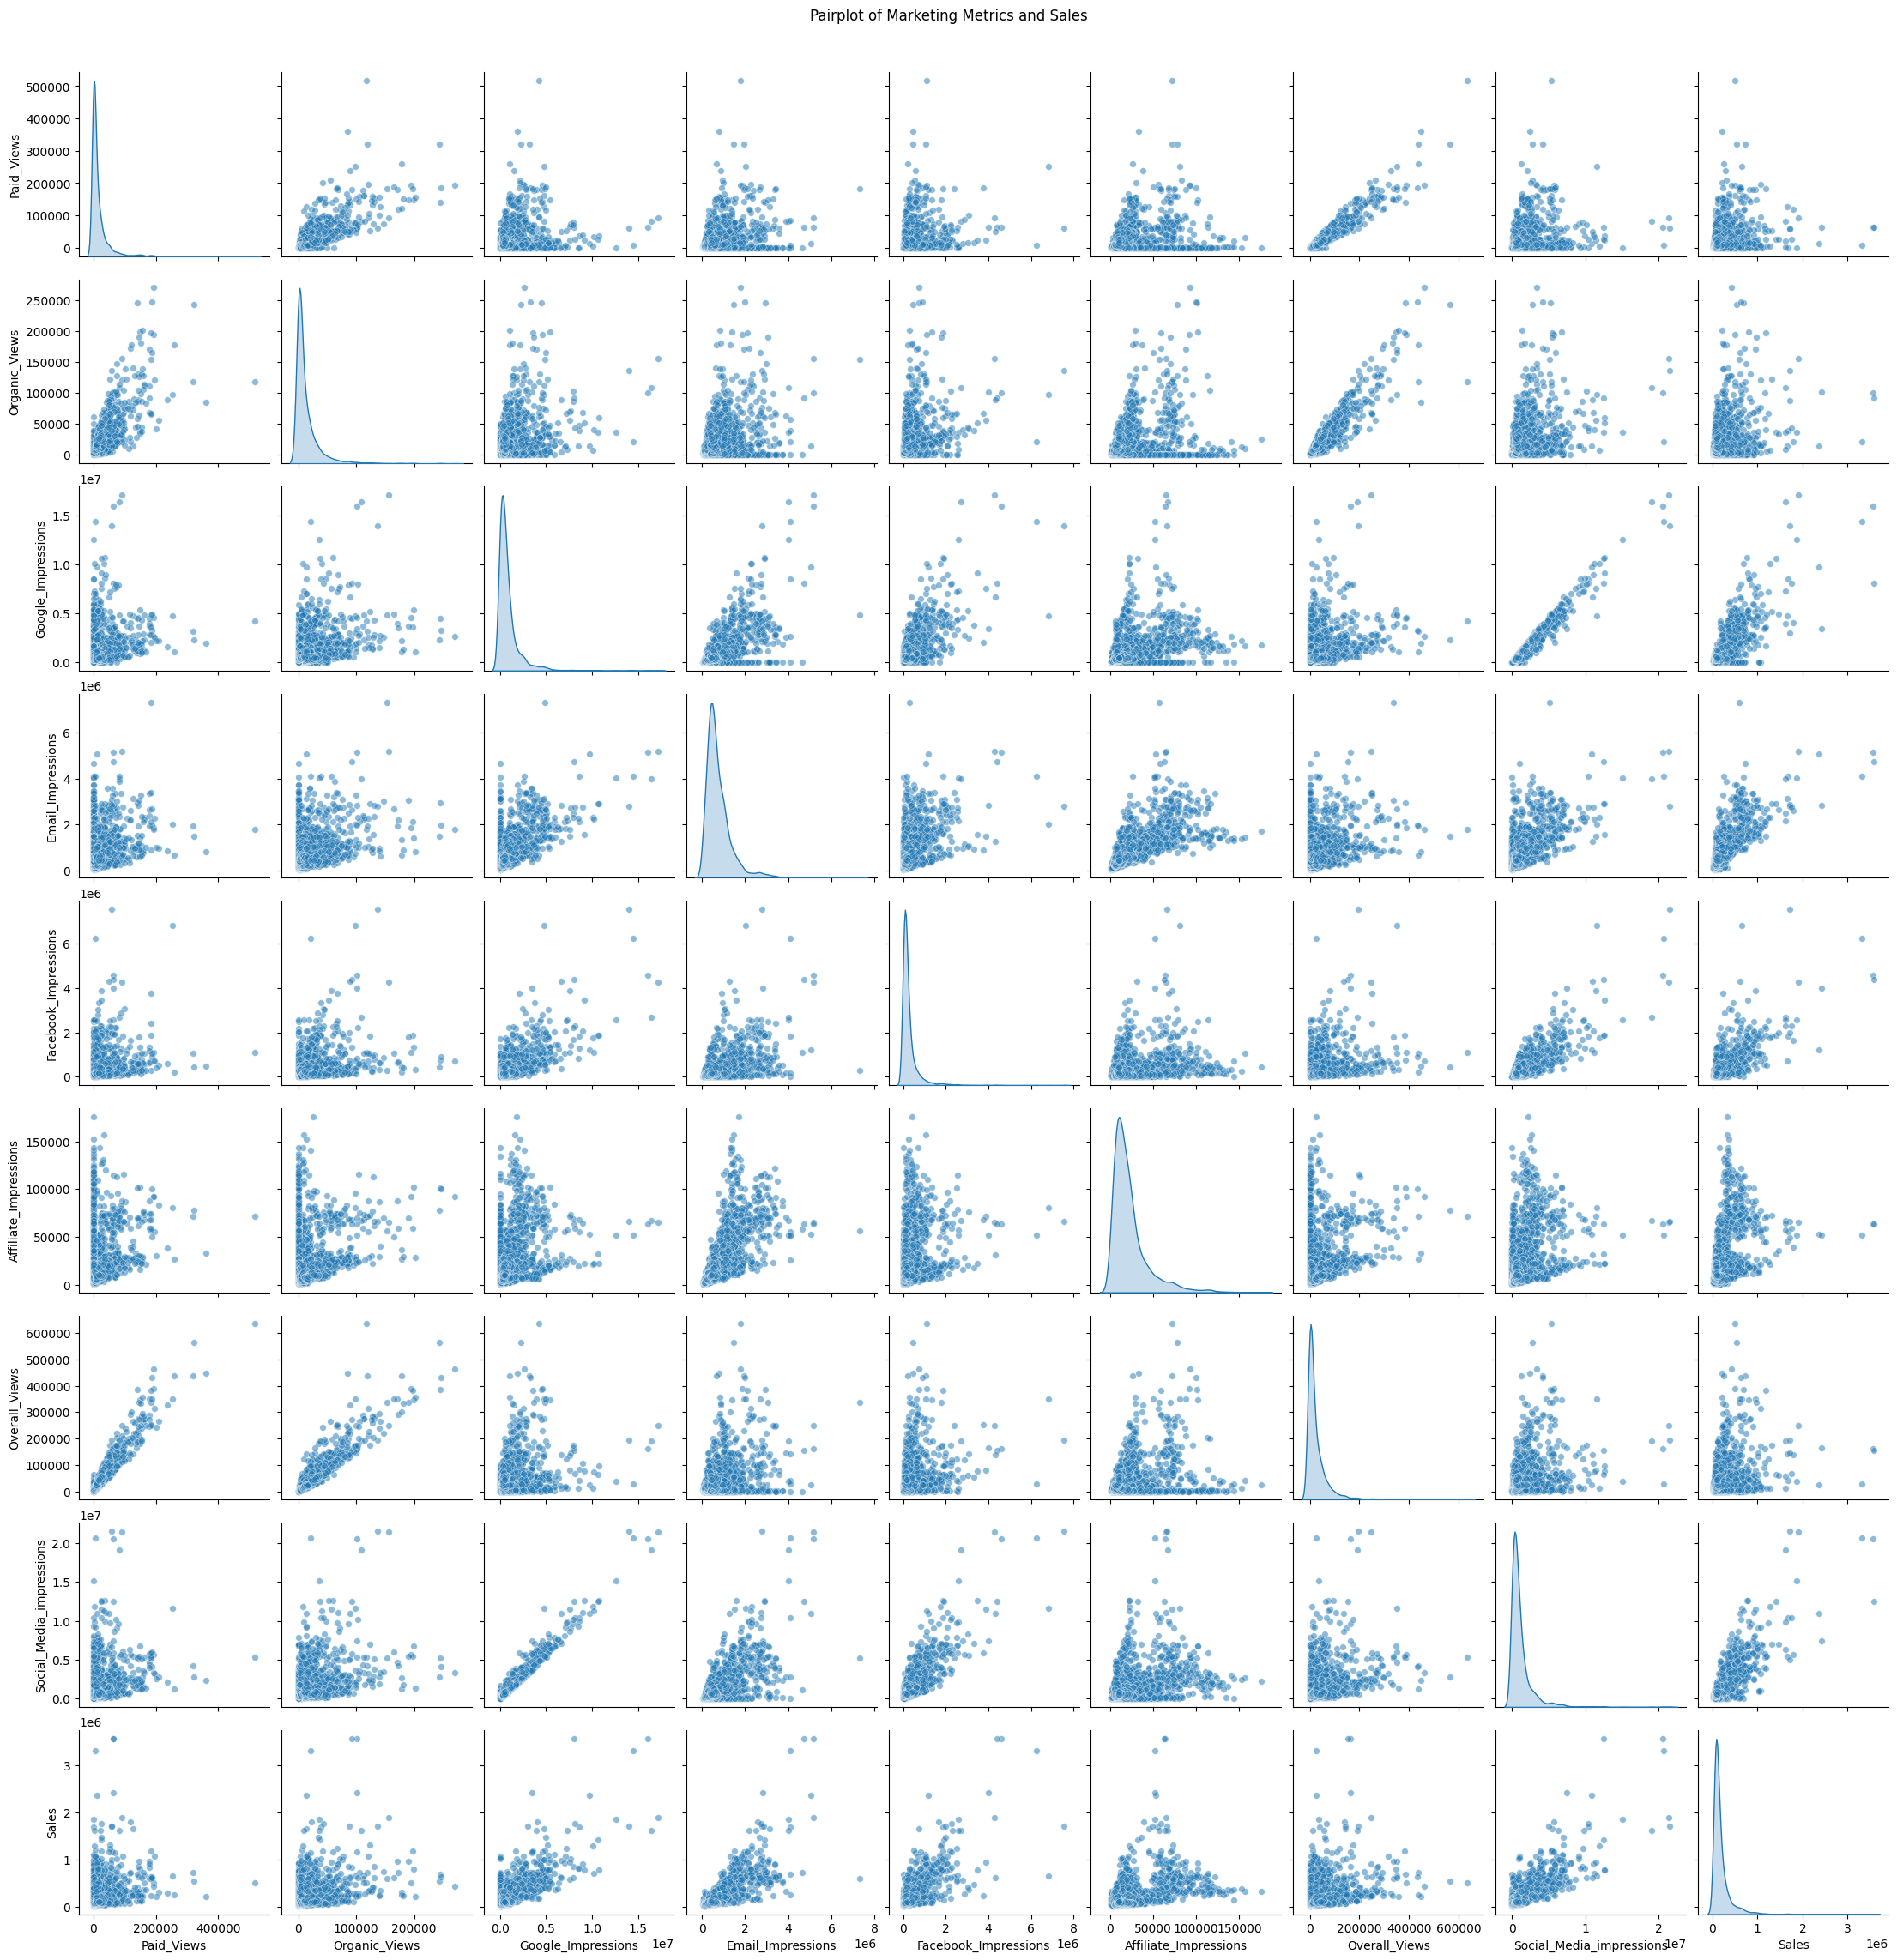

In [ ]:
# Selecting the relevant columns for pairplot
pairplot_columns = ['Paid_Views', 'Organic_Views', 'Google_Impressions', 'Email_Impressions',
                    'Facebook_Impressions', 'Affiliate_Impressions', 'Overall_Views','Social_Media_impressions', 'Sales']

# Creating the pairplot
sns.pairplot(data[pairplot_columns], diag_kind='kde', plot_kws={'alpha':0.5, 's':30})

# Display the pairplot
plt.suptitle('Pairplot of Marketing Metrics and Sales', y=1.02)
plt.show()

In [ ]:
#combine Paid_Views and Organic_Views as Views
data['Views'] = data['Paid_Views'] + data['Organic_Views']

In [ ]:
data['Calendar_Week'] = pd.to_datetime(data['Calendar_Week'], format='%m/%d/%Y')

# Verify the conversion
print(data['Calendar_Week'].head())

0   2018-01-06
1   2018-01-13
2   2018-01-20
3   2018-01-27
4   2018-02-03
Name: Calendar_Week, dtype: datetime64[ns]


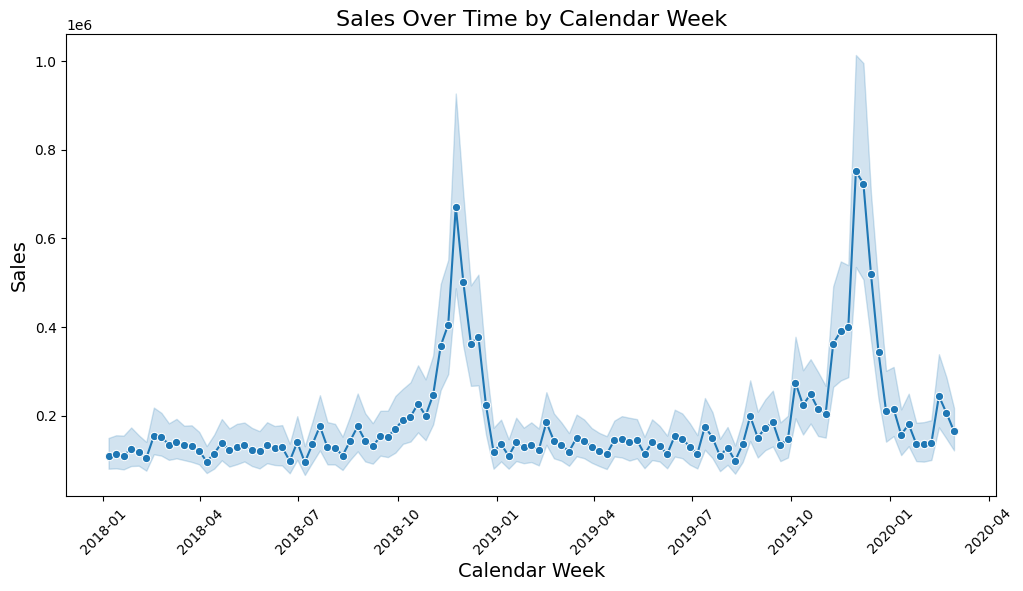

In [ ]:
df = data.sort_values('Calendar_Week')

# Plot Sales over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Calendar_Week', y='Sales', data=df, marker='o')

# Adding title and labels
plt.title('Sales Over Time by Calendar Week', fontsize=16)
plt.xlabel('Calendar Week', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

Peaks around Nov Dec, as expected

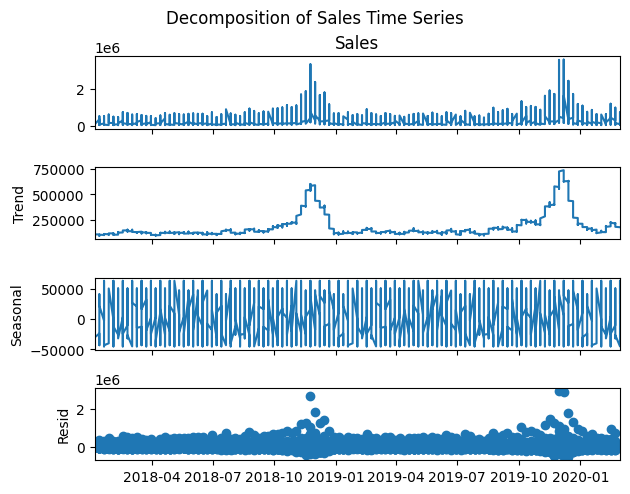

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (assuming weekly data)
df.set_index('Calendar_Week', inplace=True)
result = seasonal_decompose(df['Sales'], model='additive', period=52)  # Period=52 for weekly data assuming a yearly seasonality

# Plot the decomposition
result.plot()
plt.suptitle('Decomposition of Sales Time Series', y=1.02)
plt.show()

Transformation

1. Normalize/Standardize Data(if needed)
2. Create/Convert Features (if required)
3. Catagorical Variable Encoding
4. Feature Selection
5. Address Multicolinerarity
6. Check for Data Integrity (ensure there are no data entery errors)
7. Ensure Data is Time Serise Ready (if applicable)

Model Building

We are going to use a Multiple Linear Regression Model for this excercise.

Why
1. Predictive
2. Useful for optamization
3. Interpration, can help identify the impact of each marketing channel

In [ ]:
#data prep

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
data['Calendar_Week'] = pd.to_datetime(data['Calendar_Week'], format='%m/%d/%Y')

In [ ]:
# One-Hot Encode the 'Division' column
data = pd.get_dummies(data, columns=['Division'], drop_first=True)

KeyError: "None of [Index(['Division'], dtype='object')] are in the [columns]"

In [ ]:
# Extract relevant features from 'Calendar_Week' if needed (e.g., year and week)
data['Year'] = data['Calendar_Week'].dt.year
data['Month'] = data['Calendar_Week'].dt.month
data['Week'] = data['Calendar_Week'].dt.isocalendar().week

In [ ]:
# Define features and target variable
X = data.drop(['Sales', 'Calendar_Week', 'Facebook_Impressions', 'Google_Impressions', 'Views'], axis=1)
y = data['Sales']

In [ ]:
print(X)

      Paid_Views  Organic_Views  Email_Impressions  Affiliate_Impressions  \
0            392            422       3.498950e+05                  12072   
1            787            904       5.062702e+05                   9499   
2             81            970       4.300422e+05                  17048   
3             25            575       4.177457e+05                  10207   
4            565            284       4.085058e+05                   5834   
...          ...            ...                ...                    ...   
3046       29239          25311       1.459071e+06                  12098   
3047       26230          28031       5.342505e+05                   9548   
3048       24749          31281       4.227182e+05                   9861   
3049       20713          30356       6.085799e+05                  10221   
3050       15990          26993       4.390165e+05                  10294   

      Overall_Views  Social_Media_impressions  Division_B  Division_C  \
0 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)

In [ ]:
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.7352837813501207
Mean Squared Error: 9747147631.727922


In [ ]:
# Get the coefficients
coefficients = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



                            Coefficient
Paid_Views                     2.242373
Organic_Views                  3.275424
Email_Impressions              0.158521
Affiliate_Impressions         -2.036833
Overall_Views                 -2.698713
Social_Media_impressions       0.069084
Division_B                228386.141557
Division_C                 54466.736916
Division_D                 -4859.243845
Division_E                185724.210253
Division_F                 -2294.126047
Division_G                  2771.839588
Division_H                  3981.786574
Division_I                 23455.218406
Division_J                  6864.261191
Division_K                -16915.703398
Division_L                 21900.725034
Division_M                -12250.862363
Division_N                116974.384174
Division_O                -27729.438101
Division_P                -22710.115112
Division_Q                 -9034.455735
Division_R                 12177.914919
Division_S                 19538.977111


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop(['Sales', 'Calendar_Week'], axis=1)
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 6364021631.543371
R-squared: 0.8271638221396725


In [ ]:
# Initialize the Decision Tree Regressor with hyperparameters
decision_tree = DecisionTreeRegressor(max_depth=20, min_samples_split=2, min_samples_leaf=8, random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 10357614465.3446
R-squared: 0.7187045237137486


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [0.1, 5, 10, 15, 20],
    'min_samples_split': [0.1,2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=15,  # 5-fold cross-validation
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'max_depth': randint(1, 200),
    'min_samples_split': randint(1, 200),
    'min_samples_leaf': randint(1, 200)
}

random_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                                    param_distributions=param_distributions,
                                    n_iter=100,
                                    scoring='neg_mean_squared_error',
                                    cv=5,
                                    n_jobs=-1)
random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'max_depth': 156, 'min_samples_leaf': 6, 'min_samples_split': 51}


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
X = data.drop(['Sales', 'Calendar_Week', 'Facebook_Impressions', 'Google_Impressions', 'Views'], axis=1)
y = data['Sales']
# Initialize Ridge regression model with a regularization strength
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")

R-squared: 0.7334740915902869


In [ ]:
ridge_coefficients = ridge_model.coef_
ridge_intercept = ridge_model.intercept_
print("Ridge Coefficients:", ridge_coefficients)
print("Ridge Intercept:", ridge_intercept)


Ridge Coefficients: [ 2.28734505e+00  3.31333415e+00  1.62191368e-01 -1.89302599e+00
 -2.72504961e+00  6.91595489e-02 -4.58052989e+03  5.25685153e+03
  1.73701627e+02  2.01838233e+05  5.26061053e+04 -1.35957067e+04
  1.64328913e+05 -7.99633831e+03 -6.14495070e+03  1.11291669e+02
  1.76458242e+04  2.66431026e+03 -2.18657079e+04  1.39873634e+04
 -1.74871850e+04  1.07661283e+05 -4.02259886e+04 -2.81864904e+04
 -1.57315469e+04  9.77042527e+03  9.72639158e+03 -8.63613281e+03
 -3.52184636e+04 -1.40502746e+04  8.68352604e+03 -1.34423583e+04
 -1.29663976e+04 -4.29711066e+04]
Ridge Intercept: 9224386.403564647


In [ ]:
# Feature names should match your X_train columns
feature_names = X_train.columns

# Ridge
ridge_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Ridge Regression Coefficients:")
print(ridge_results)

Ridge Regression Coefficients:
                     Feature    Coefficient
9                 Division_B  201838.233116
12                Division_E  164328.913327
21                Division_N  107661.283421
10                Division_C   52606.105281
16                Division_I   17645.824171
19                Division_L   13987.363361
25                Division_R    9770.425269
26                Division_S    9726.391578
30                Division_W    8683.526041
7                      Month    5256.851527
17                Division_J    2664.310259
8                       Week     173.701627
15                Division_H     111.291669
1              Organic_Views       3.313334
0                 Paid_Views       2.287345
2          Email_Impressions       0.162191
5   Social_Media_impressions       0.069160
3      Affiliate_Impressions      -1.893026
4              Overall_Views      -2.725050
6                       Year   -4580.529894
14                Division_G   -6144.950699
1

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0]  # List of alpha values to try
}

# Initialize Ridge model
ridge = Ridge()

# Initialize GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid,
                                  scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and the best score
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score_ridge = -grid_search_ridge.best_score_

print(f"Best alpha for Ridge Regression: {best_alpha_ridge}")
print(f"Best MSE for Ridge Regression: {best_score_ridge}")

# Evaluate on test data
y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Test MSE for Ridge Regression: {test_mse_ridge}")


Best alpha for Ridge Regression: 1.0
Best MSE for Ridge Regression: 11450912127.036753
Test MSE for Ridge Regression: 9813782435.393116


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
X = data.drop(['Sales'], axis=1)
y = data['Sales']
# Initialize Lasso regression model with a regularization strength
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso_model.predict(X_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")

R-squared: 0.7354953089442565


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.348e+13, tolerance: 1.420e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
lasso_coefficients = lasso_model.coef_
lasso_intercept = lasso_model.intercept_
print("Lasso Coefficients:", lasso_coefficients)
print("Lasso Intercept:", lasso_intercept)

Lasso Coefficients: [ 4.78920814e-01  1.50969013e+00  1.58411754e-01 -2.03666993e+00
 -9.33828675e-01  6.90948505e-02 -5.04064578e+03  4.84034710e+03
  2.33009813e+02  2.28570333e+05  5.45921843e+04 -4.43268240e+03
  1.85951389e+05 -2.25263736e+03  2.86220278e+03  3.99943888e+03
  2.34828080e+04  7.03758271e+03 -1.69085199e+04  2.20968733e+04
 -1.19351667e+04  1.17212215e+05 -2.75673155e+04 -2.25514573e+04
 -8.81464823e+03  1.24486120e+04  1.97734259e+04 -6.87939999e+03
 -3.16321725e+04 -2.03708662e+03  1.48508693e+04 -9.52529656e+03
 -9.79523043e+03 -3.60902062e+04]
Lasso Intercept: 10154422.543943275


In [ ]:
lasso_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Lasso Regression Coefficients:")
print(lasso_results)

Lasso Regression Coefficients:
                     Feature    Coefficient
9                 Division_B  228570.333459
12                Division_E  185951.388581
21                Division_N  117212.214789
10                Division_C   54592.184299
16                Division_I   23482.808006
19                Division_L   22096.873292
26                Division_S   19773.425870
30                Division_W   14850.869263
25                Division_R   12448.611981
17                Division_J    7037.582708
7                      Month    4840.347096
15                Division_H    3999.438876
14                Division_G    2862.202785
8                       Week     233.009813
1              Organic_Views       1.509690
0                 Paid_Views       0.478921
2          Email_Impressions       0.158412
5   Social_Media_impressions       0.069095
4              Overall_Views      -0.933829
3      Affiliate_Impressions      -2.036670
29                Division_V   -2037.086621
1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop(['Sales', 'Calendar_Week', 'Facebook_Impressions', 'Google_Impressions', 'Views'], axis=1)
y = data['Sales']

# Initialize the model
model = LinearRegression()

# Perform cross-validation for R-squared
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Perform cross-validation for Mean Squared Error
cv_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE for easier interpretation
cv_mse_scores = -cv_mse_scores

# Print cross-validation scores
print(f"Cross-Validation R-squared Scores: {cv_r2_scores}")
print(f"Mean R-squared Score: {cv_r2_scores.mean()}")

print(f"Cross-Validation MSE Scores: {cv_mse_scores}")
print(f"Mean MSE Score: {cv_mse_scores.mean()}")

Cross-Validation R-squared Scores: [0.65633676 0.64629941 0.52533242 0.7177135  0.67859312]
Mean R-squared Score: 0.6448550415868144
Cross-Validation MSE Scores: [5.74031602e+10 2.91950388e+09 1.55103012e+10 4.60612228e+09
 5.01974984e+09]
Mean MSE Score: 17091767479.404892


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get the coefficients
coefficients = model.coef_

# Get the intercept
intercept = model.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")

Coefficients: [ 2.24237264e+00  3.27542439e+00  1.58521267e-01 -2.03683294e+00
 -2.69871303e+00  6.90835064e-02 -4.99159687e+03  4.93525680e+03
  2.11118429e+02  2.28386142e+05  5.44667369e+04 -4.85924385e+03
  1.85724210e+05 -2.29412605e+03  2.77183959e+03  3.98178657e+03
  2.34552184e+04  6.86426119e+03 -1.69157034e+04  2.19007250e+04
 -1.22508624e+04  1.16974384e+05 -2.77294381e+04 -2.27101151e+04
 -9.03445574e+03  1.21779149e+04  1.95389771e+04 -6.97183890e+03
 -3.16983276e+04 -2.29739199e+03  1.47492704e+04 -9.79473380e+03
 -9.96032050e+03 -3.61769380e+04]
Intercept: 10054633.949007919
Mean Squared Error (MSE): 9747147631.727802
R-squared Score: 0.7352837813501241


In [ ]:
reg_results = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("Regression Coefficients:")
print(reg_results)

Regression Coefficients:
                     Feature    Coefficient
9                 Division_B  228386.141557
12                Division_E  185724.210253
21                Division_N  116974.384174
10                Division_C   54466.736916
16                Division_I   23455.218406
19                Division_L   21900.725034
26                Division_S   19538.977111
30                Division_W   14749.270383
25                Division_R   12177.914919
17                Division_J    6864.261191
7                      Month    4935.256803
15                Division_H    3981.786574
14                Division_G    2771.839588
8                       Week     211.118429
1              Organic_Views       3.275424
0                 Paid_Views       2.242373
2          Email_Impressions       0.158521
5   Social_Media_impressions       0.069084
3      Affiliate_Impressions      -2.036833
4              Overall_Views      -2.698713
13                Division_F   -2294.126047
29     

In [ ]:
'''
# Define features and target variable
X = data.drop(['Sales', 'Calendar_Week', 'Facebook_Impressions', 'Google_Impressions', 'Views', 'Division_B', 'Division_C','Division_D','Division_E','Division_F','Division_G','Division_H','Division_I', 'Division_J','Division_K', 'Division_L', 'Division_M', 'Division_N', 'Division_P', 'Division_Q', 'Division_R', 'Division_S', 'Division_T', 'Division_U', 'Division_W','Division_X','Division_Y', 'Division_Z', 'Division_V', 'Division_O'], axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)
# Calculate R-squared and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
# Get the coefficients
coefficients = pd.DataFrame(mlr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
'''

R-squared: 0.7024783274070793
Mean Squared Error: 10955081185.401106
                          Coefficient
Paid_Views                   2.363667
Organic_Views                3.415071
Email_Impressions            0.178053
Affiliate_Impressions       -0.450396
Overall_Views               -2.754798
Social_Media_impressions     0.067605
Year                      3335.361392
Month                     7129.866176
Week                       230.315162


As a last step, need to check if model can be improved

**Interpretation**

We built an MLR model to interpret the data better and to identify the marketing cahnnels that have the highest impact on sales.

We the bult a regularized model using both L1 and L2 regularization to ensure that our model was not overfit. The trend of the coefficents was simillar in both the MLR and the regularized models so we will use the MLR coefficents to build our recommendations.

Views both organic and Paid have a high impact on overall sales. For every Paid view we experiance a 2.242 increase in sales and 3.275 impact for every organic view. Email also appears to be a significant with every email view contributing 0.15 to sales. FInally, Social Media which is an interaction term we created for Google and Facebbok views has an impact of 0.069.

The recommendation here is simple, increase focus and investment on all of the mentioned channels. Investing good SEO, and paid content along with Email campaigns is bound to pay off devidents.

Affiliate impressions has a negetive effect with every affiliate view costing 2.036 sales. Since Affiliate programs are expensive to run, eliminating the affiliate program right away is a good practice.

We also see a month over month and week over week sales improvement. this can be causeuse of the time sensetive nature of our sales as seen in the sales timeserise, with sales picking up around the holidays.

Divisions seem to be the single largest impact creating variable. Division B, E, C, I are all highly impactful. It would be prudent to focus on Divisions that have ahigh impact and slowly cull the Divisions that have a low impact in terms of sales.
